In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Dataset/application_train.csv", encoding='latin1')
pd.set_option('display.max_columns', 150)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.describe()

## Data Preprocessing

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

numerical_df = numerical_df.applymap(abs)

In [ ]:
df.drop(columns=['SK_ID_CURR'], inplace=True)

In [ ]:
most_frequent = df['CODE_GENDER'].mode()[0]
df['CODE_GENDER'].replace('XNA', most_frequent, inplace=True)
print(df['CODE_GENDER'].value_counts())

In [ ]:
df.insull().sum()

In [ ]:
def fill_na_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

In [ ]:
columns_to_fill = df.select_dtypes(include=['number']).columns

In [ ]:
fill_na_with_mean(df, columns_to_fill)

In [ ]:
def fill_na_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

In [ ]:
columns_to_fill = df.select_dtypes(include=['object']).columns

In [ ]:
fill_na_with_mode(df, columns_to_fill)

## Data Analysis and Visualization

In [ ]:
def calculate_ratios(df, feature_column, target_column):
    ratios = {}

    unique_features = df[feature_column].unique()

    for feature in unique_features:
        df_feature = df[df[feature_column] == feature]
        df_feature_target = df_feature[df_feature[target_column] == 1]

        if len(df_feature) != 0:
            ratio = 100*(len(df_feature_target) / len(df_feature))
        else:
            ratio = 0

        ratio = round(ratio, 3)
        ratios[f'{feature} ratio'] = ratio

    for feature, ratio in ratios.items():
        print(f"Defaulter ratio for customers with {feature}: {ratio:.3f}%")

<Axes: ylabel='count'>

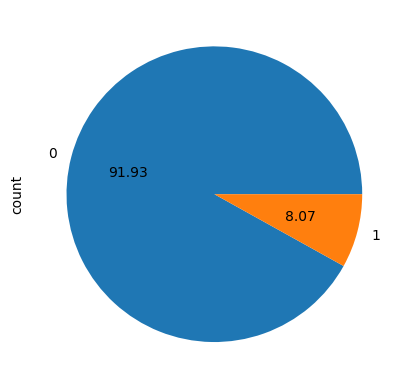

In [ ]:
df["TARGET"].value_counts().plot(kind="pie",autopct='%.2f')

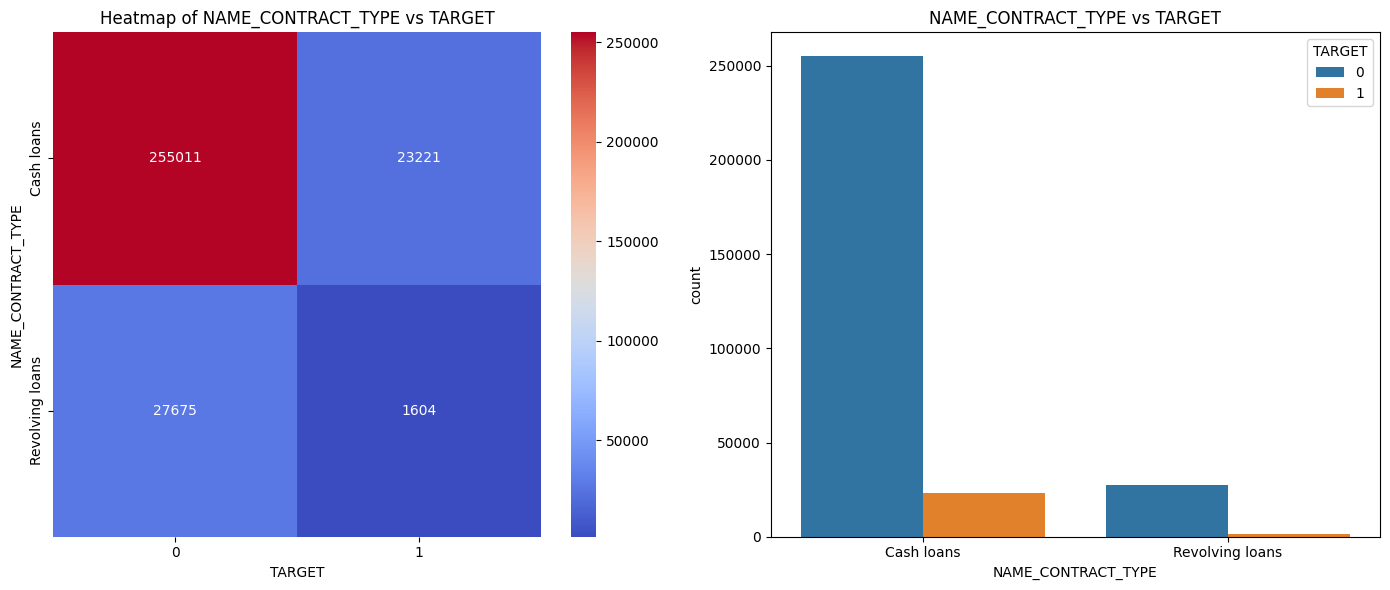

Defaulter ratio for customers with Cash loans ratio: 8.346%
Defaulter ratio for customers with Revolving loans ratio: 5.478%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
cross_tab = pd.crosstab(df['NAME_CONTRACT_TYPE'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0], fmt="d")
axes[0].set_title('Heatmap of NAME_CONTRACT_TYPE vs TARGET')
# Count Plot
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
plt.title('NAME_CONTRACT_TYPE vs TARGET')

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'NAME_CONTRACT_TYPE', 'TARGET')

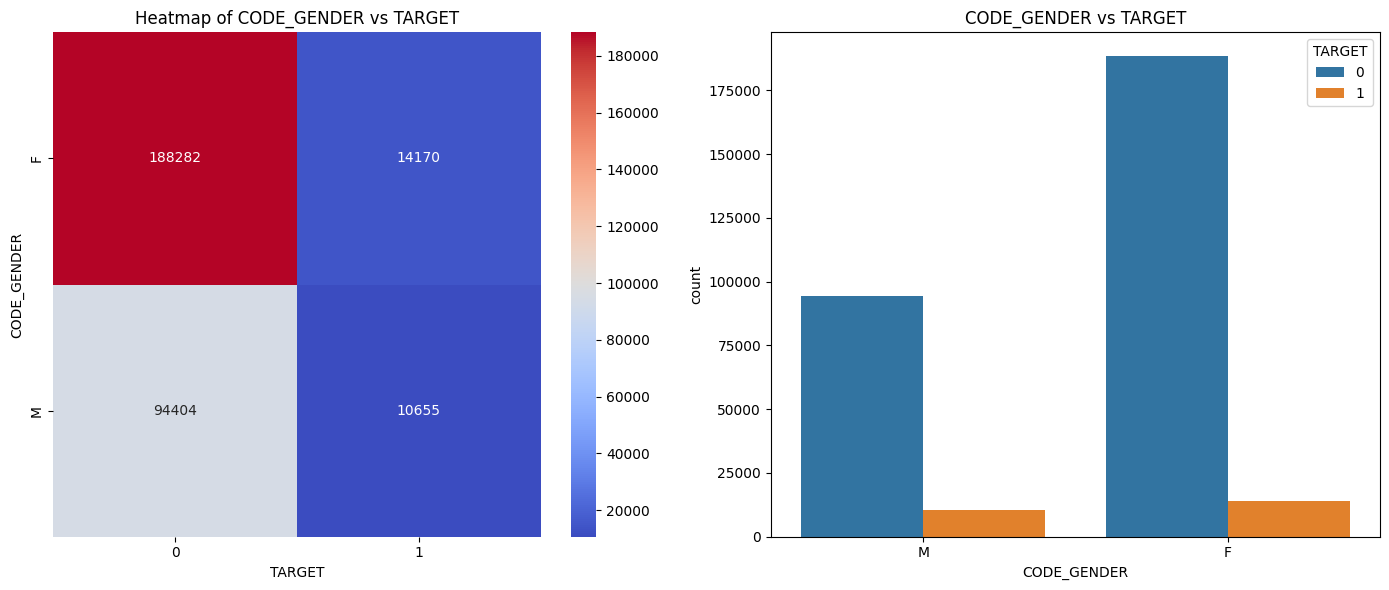

Defaulter ratio for customers with M ratio: 10.142%
Defaulter ratio for customers with F ratio: 6.999%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
cross_tab = pd.crosstab(df['CODE_GENDER'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0], fmt="d")
axes[0].set_title('Heatmap of CODE_GENDER vs TARGET')
# Count Plot
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)
plt.title('CODE_GENDER vs TARGET')

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'CODE_GENDER', 'TARGET')

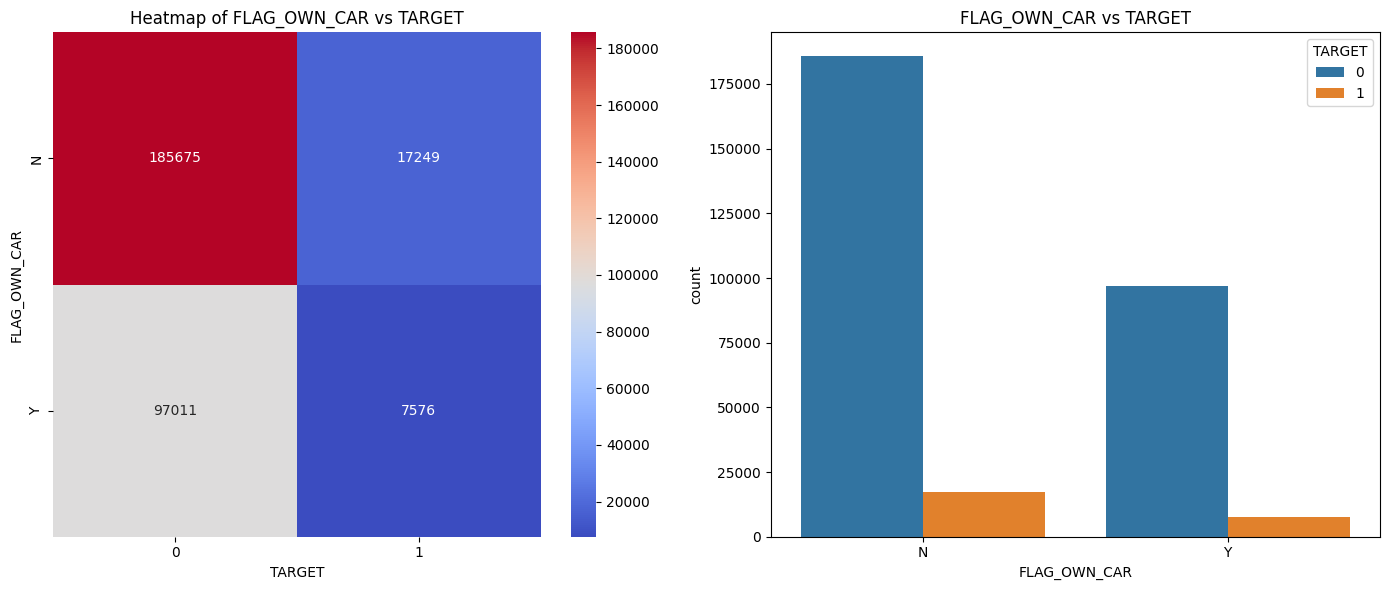

Defaulter ratio for customers with N ratio: 8.500%
Defaulter ratio for customers with Y ratio: 7.244%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
cross_tab = pd.crosstab(df['FLAG_OWN_CAR'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of FLAG_OWN_CAR vs TARGET')
# Count Plot
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df)
plt.title('FLAG_OWN_CAR vs TARGET')

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'FLAG_OWN_CAR', 'TARGET')

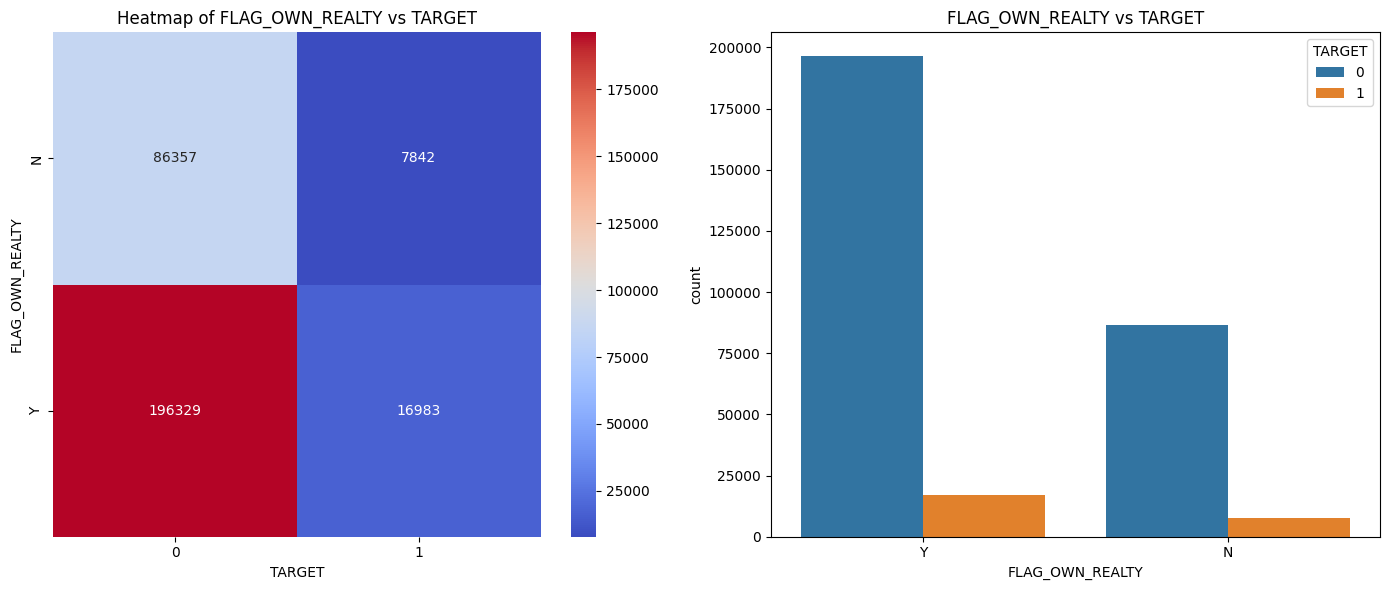

Defaulter ratio for customers with Y ratio: 7.962%
Defaulter ratio for customers with N ratio: 8.325%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
cross_tab = pd.crosstab(df['FLAG_OWN_REALTY'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of FLAG_OWN_REALTY vs TARGET')
# Count Plot
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df)
plt.title('FLAG_OWN_REALTY vs TARGET')

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'FLAG_OWN_REALTY', 'TARGET')

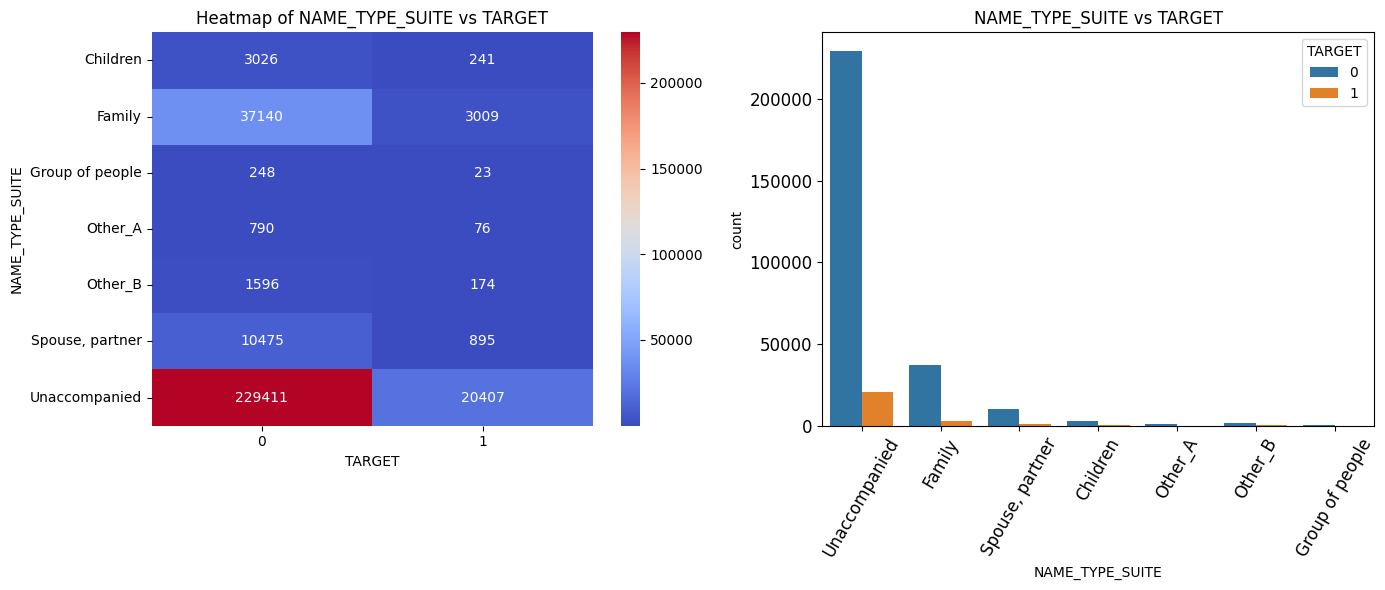

Defaulter ratio for customers with Unaccompanied ratio: 8.169%
Defaulter ratio for customers with Family ratio: 7.495%
Defaulter ratio for customers with Spouse, partner ratio: 7.872%
Defaulter ratio for customers with Children ratio: 7.377%
Defaulter ratio for customers with Other_A ratio: 8.776%
Defaulter ratio for customers with Other_B ratio: 9.831%
Defaulter ratio for customers with Group of people ratio: 8.487%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
cross_tab = pd.crosstab(df['NAME_TYPE_SUITE'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0], fmt="d")
axes[0].set_title('Heatmap of NAME_TYPE_SUITE vs TARGET')
# Count Plot
sns.countplot(x='NAME_TYPE_SUITE', hue='TARGET', data=df)
plt.title('NAME_TYPE_SUITE vs TARGET')
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'NAME_TYPE_SUITE', 'TARGET')

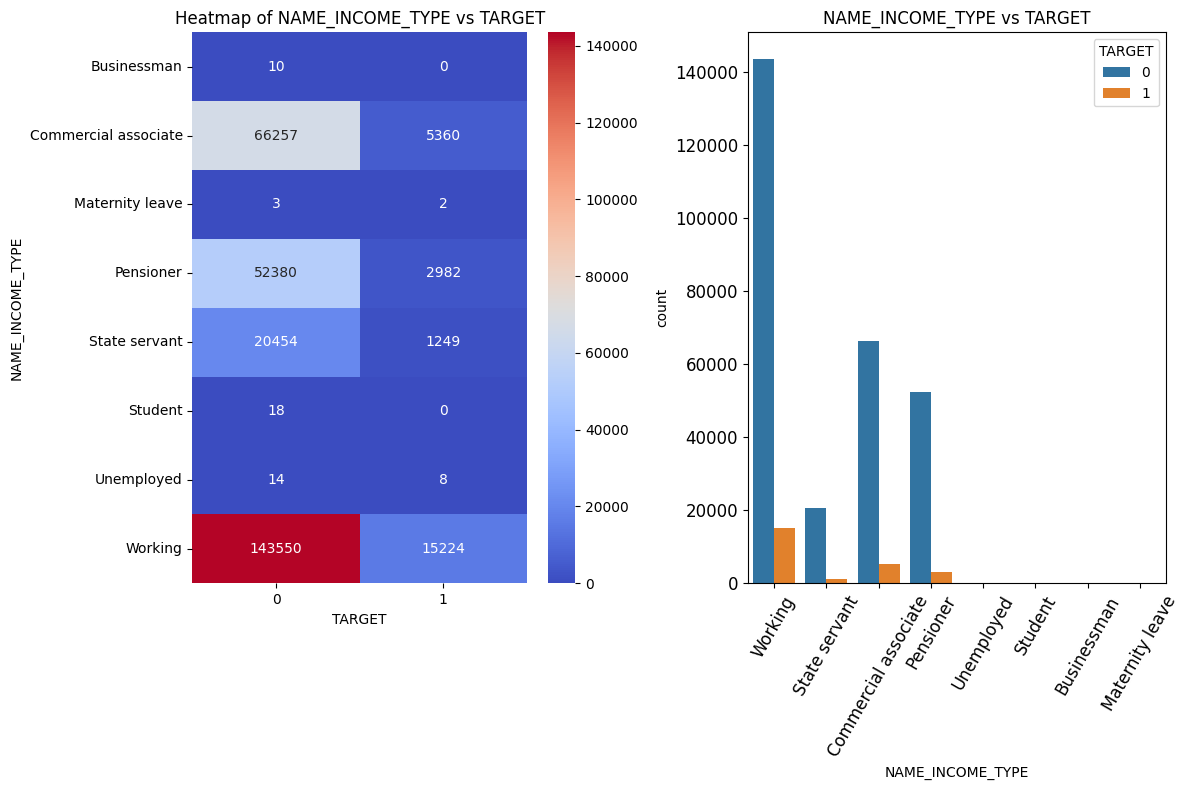

Defaulter ratio for customers with Working ratio: 9.588%
Defaulter ratio for customers with State servant ratio: 5.755%
Defaulter ratio for customers with Commercial associate ratio: 7.484%
Defaulter ratio for customers with Pensioner ratio: 5.386%
Defaulter ratio for customers with Unemployed ratio: 36.364%
Defaulter ratio for customers with Student ratio: 0.000%
Defaulter ratio for customers with Businessman ratio: 0.000%
Defaulter ratio for customers with Maternity leave ratio: 40.000%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Heatmap
cross_tab = pd.crosstab(df['NAME_INCOME_TYPE'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of NAME_INCOME_TYPE vs TARGET')
# Count Plot
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=df)
plt.title('NAME_INCOME_TYPE vs TARGET')
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'NAME_INCOME_TYPE', 'TARGET')

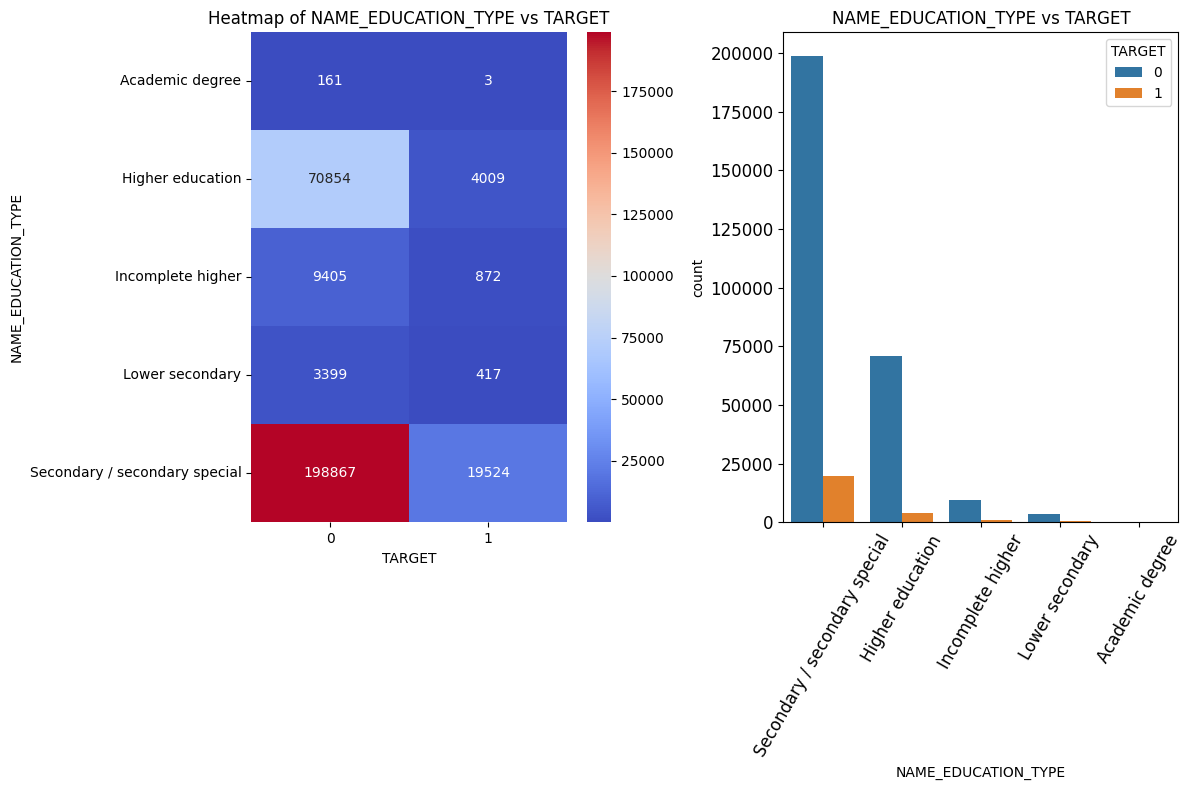

Defaulter ratio for customers with Secondary / secondary special ratio: 8.940%
Defaulter ratio for customers with Higher education ratio: 5.355%
Defaulter ratio for customers with Incomplete higher ratio: 8.485%
Defaulter ratio for customers with Lower secondary ratio: 10.928%
Defaulter ratio for customers with Academic degree ratio: 1.829%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Heatmap
cross_tab = pd.crosstab(df['NAME_EDUCATION_TYPE'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of NAME_EDUCATION_TYPE vs TARGET')
# Count Plot
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df)
plt.title('NAME_EDUCATION_TYPE vs TARGET')
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'NAME_EDUCATION_TYPE', 'TARGET')

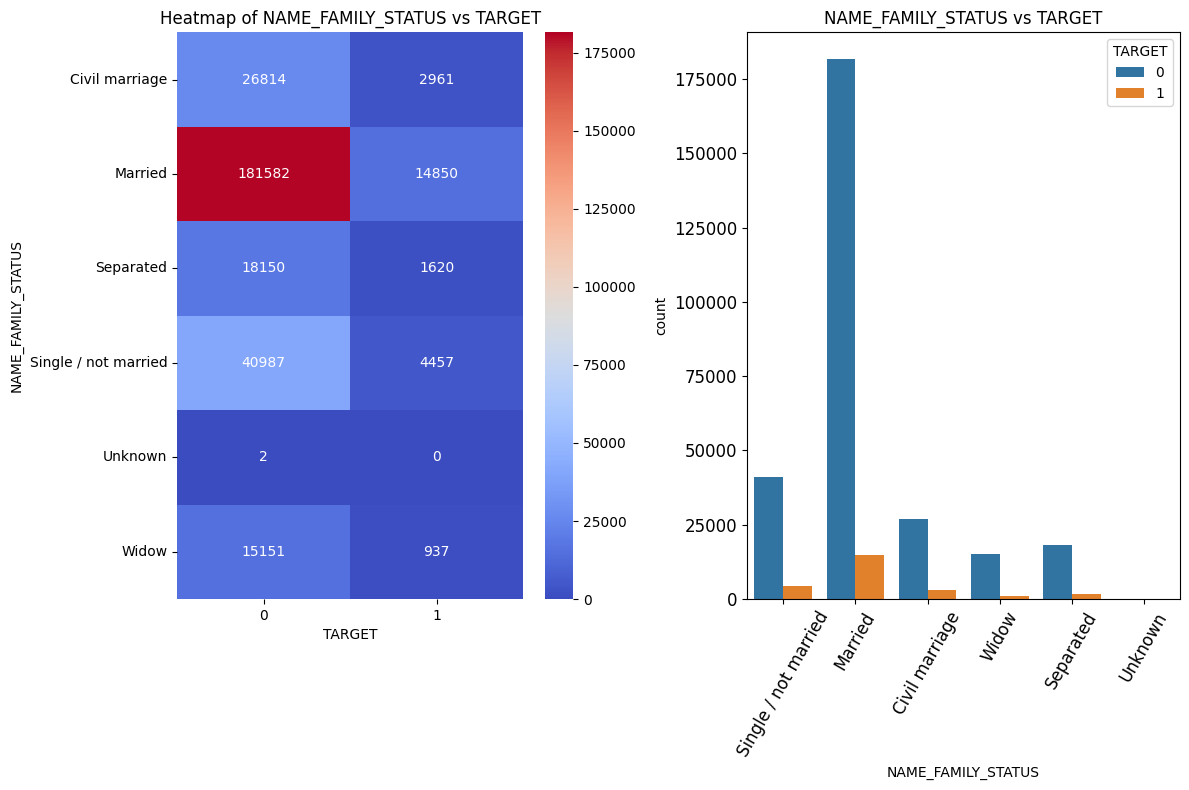

Defaulter ratio for customers with Single / not married ratio: 9.808%
Defaulter ratio for customers with Married ratio: 7.560%
Defaulter ratio for customers with Civil marriage ratio: 9.945%
Defaulter ratio for customers with Widow ratio: 5.824%
Defaulter ratio for customers with Separated ratio: 8.194%
Defaulter ratio for customers with Unknown ratio: 0.000%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

cross_tab = pd.crosstab(df['NAME_FAMILY_STATUS'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of NAME_FAMILY_STATUS vs TARGET')
# Count Plot
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df)
plt.title('NAME_FAMILY_STATUS vs TARGET')
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'NAME_FAMILY_STATUS', 'TARGET')

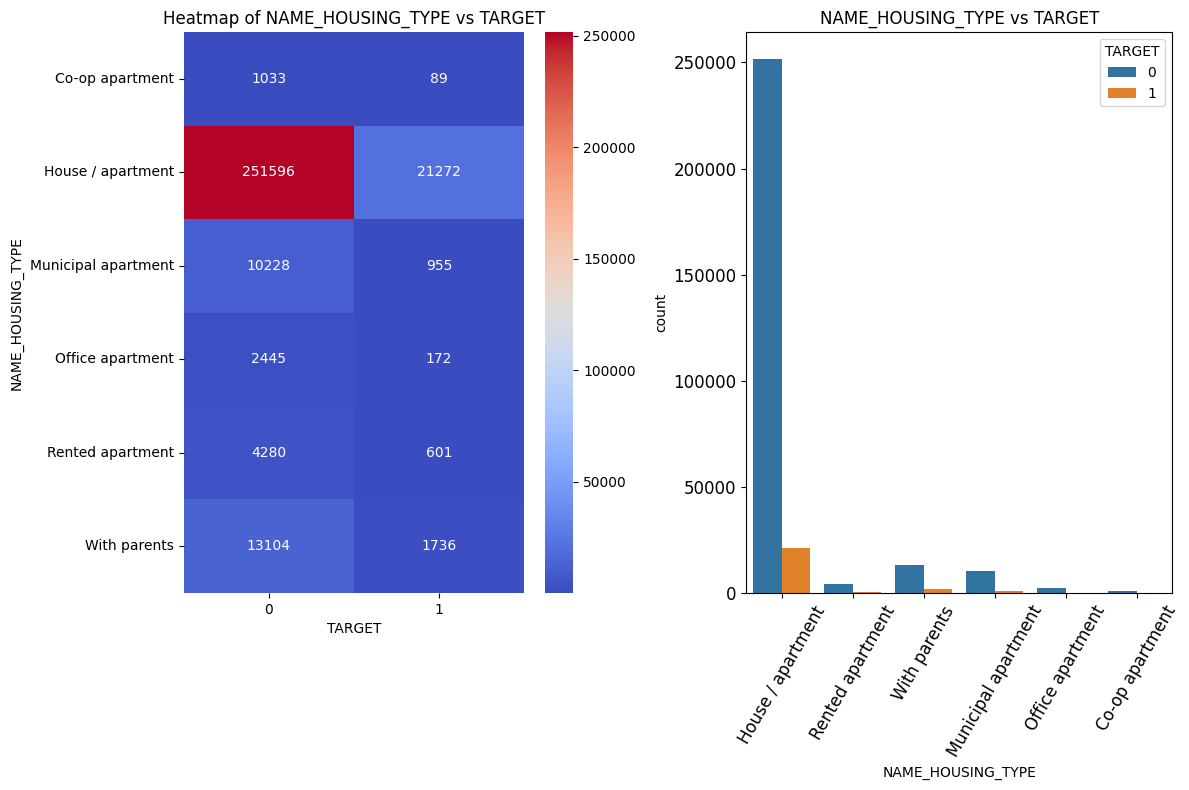

Defaulter ratio for customers with House / apartment ratio: 7.796%
Defaulter ratio for customers with Rented apartment ratio: 12.313%
Defaulter ratio for customers with With parents ratio: 11.698%
Defaulter ratio for customers with Municipal apartment ratio: 8.540%
Defaulter ratio for customers with Office apartment ratio: 6.572%
Defaulter ratio for customers with Co-op apartment ratio: 7.932%


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

cross_tab = pd.crosstab(df['NAME_HOUSING_TYPE'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of NAME_HOUSING_TYPE vs TARGET')
# Count Plot
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df)
plt.title('NAME_HOUSING_TYPE vs TARGET')
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'NAME_HOUSING_TYPE', 'TARGET')

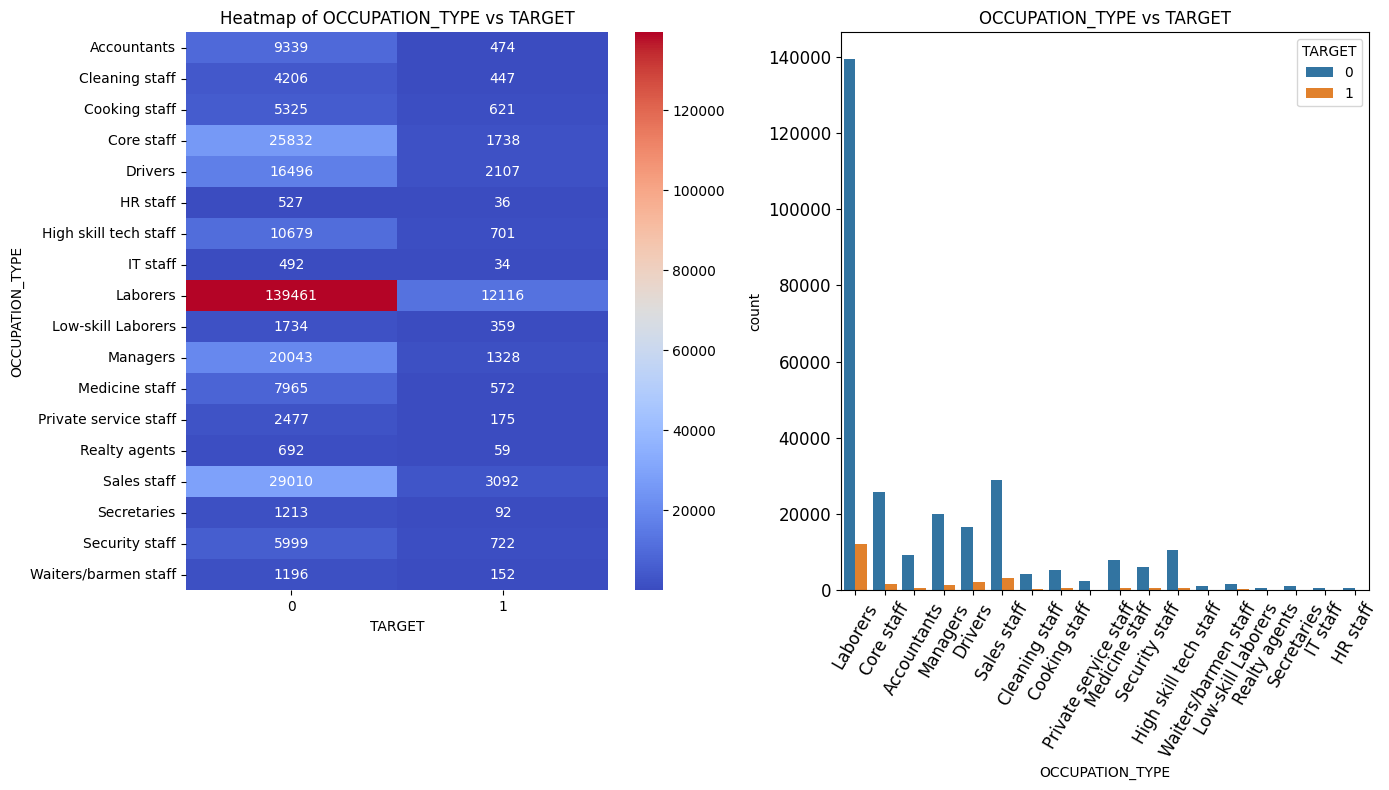

Defaulter ratio for customers with Laborers ratio: 7.993%
Defaulter ratio for customers with Core staff ratio: 6.304%
Defaulter ratio for customers with Accountants ratio: 4.830%
Defaulter ratio for customers with Managers ratio: 6.214%
Defaulter ratio for customers with Drivers ratio: 11.326%
Defaulter ratio for customers with Sales staff ratio: 9.632%
Defaulter ratio for customers with Cleaning staff ratio: 9.607%
Defaulter ratio for customers with Cooking staff ratio: 10.444%
Defaulter ratio for customers with Private service staff ratio: 6.599%
Defaulter ratio for customers with Medicine staff ratio: 6.700%
Defaulter ratio for customers with Security staff ratio: 10.742%
Defaulter ratio for customers with High skill tech staff ratio: 6.160%
Defaulter ratio for customers with Waiters/barmen staff ratio: 11.276%
Defaulter ratio for customers with Low-skill Laborers ratio: 17.152%
Defaulter ratio for customers with Realty agents ratio: 7.856%
Defaulter ratio for customers with Secreta

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

cross_tab = pd.crosstab(df['OCCUPATION_TYPE'], df['TARGET'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', ax=axes[0],fmt="d")
axes[0].set_title('Heatmap of OCCUPATION_TYPE vs TARGET')
# Count Plot
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=df)
plt.title('OCCUPATION_TYPE vs TARGET')
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()
calculate_ratios(df, 'OCCUPATION_TYPE', 'TARGET')

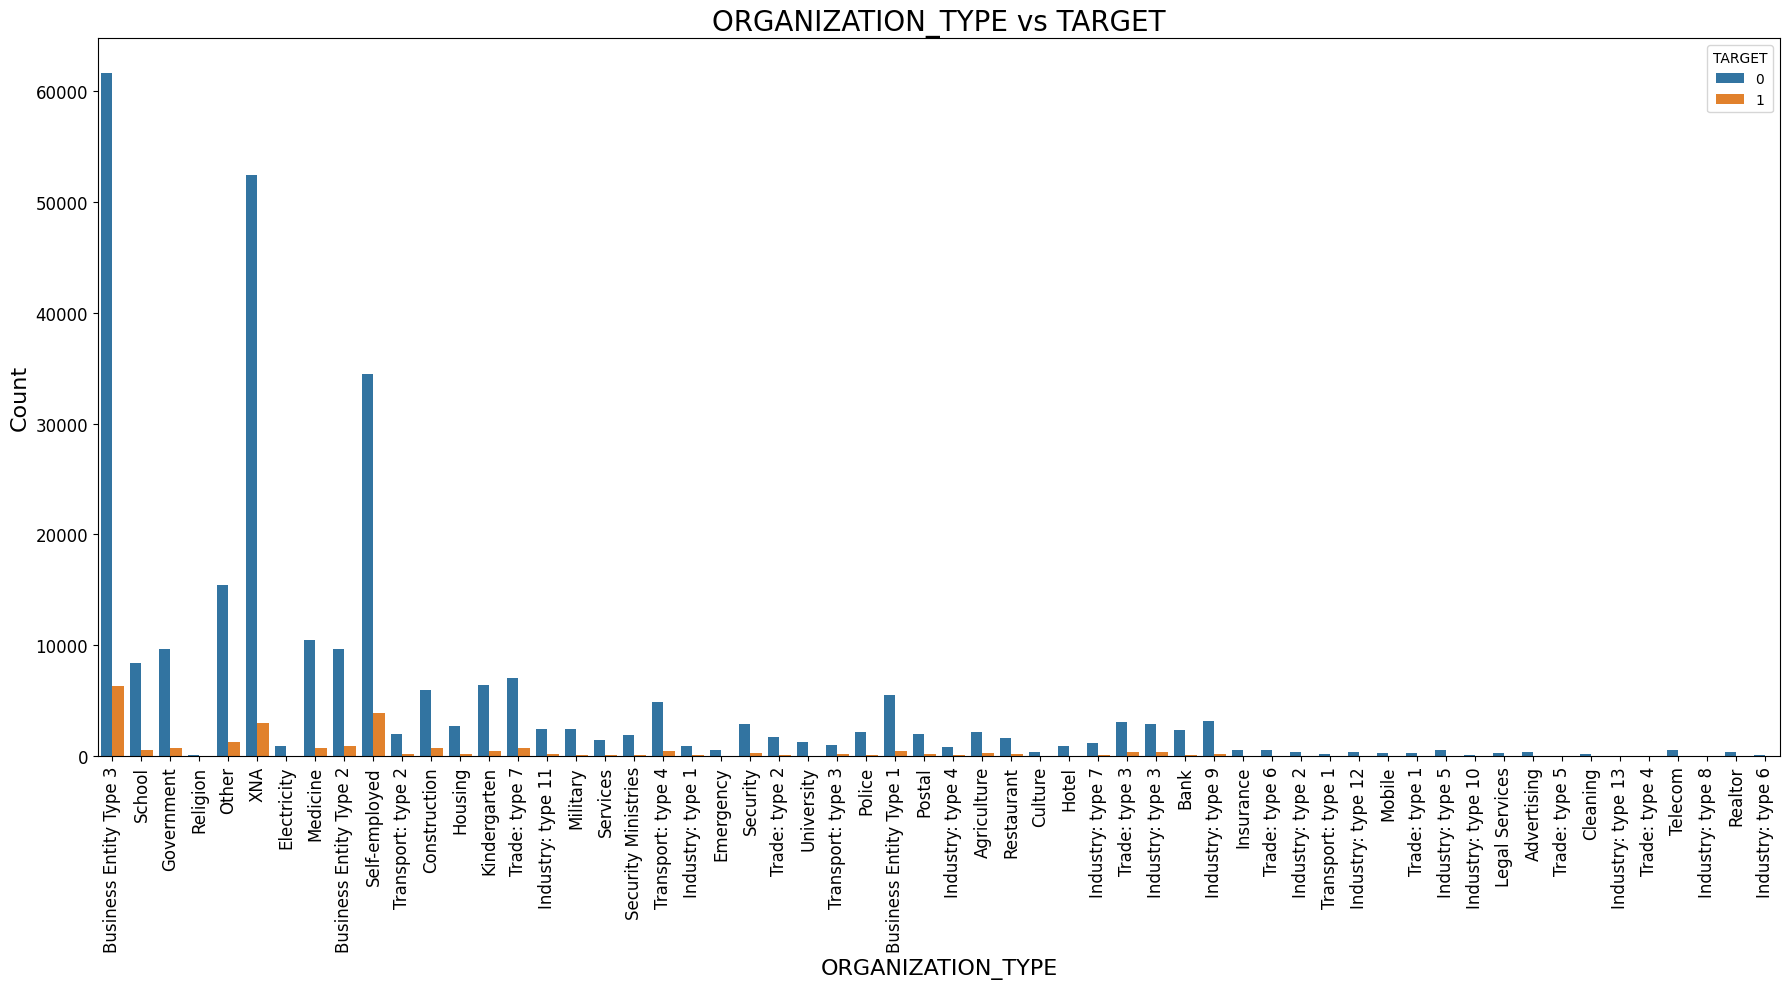

Defaulter ratio for customers with Business Entity Type 3 ratio: 9.300%
Defaulter ratio for customers with School ratio: 5.915%
Defaulter ratio for customers with Government ratio: 6.978%
Defaulter ratio for customers with Religion ratio: 5.882%
Defaulter ratio for customers with Other ratio: 7.643%
Defaulter ratio for customers with XNA ratio: 5.400%
Defaulter ratio for customers with Electricity ratio: 6.632%
Defaulter ratio for customers with Medicine ratio: 6.584%
Defaulter ratio for customers with Business Entity Type 2 ratio: 8.528%
Defaulter ratio for customers with Self-employed ratio: 10.174%
Defaulter ratio for customers with Transport: type 2 ratio: 7.804%
Defaulter ratio for customers with Construction ratio: 11.680%
Defaulter ratio for customers with Housing ratio: 7.945%
Defaulter ratio for customers with Kindergarten ratio: 7.035%
Defaulter ratio for customers with Trade: type 7 ratio: 9.450%
Defaulter ratio for customers with Industry: type 11 ratio: 8.654%
Defaulter ra

In [ ]:
plt.figure(figsize=(18, 10))

sns.countplot(x='ORGANIZATION_TYPE', hue='TARGET', data=df)

plt.title('ORGANIZATION_TYPE vs TARGET', fontsize=20)
plt.xlabel('ORGANIZATION_TYPE', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
calculate_ratios(df, 'ORGANIZATION_TYPE', 'TARGET')